In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv('/content/bank-full.csv', delimiter=';')

In [3]:
# Data Cleaning and Preprocessing
df.job.replace('unknown', df.job.mode()[0], inplace=True)
df.education.replace('unknown', df.education.mode()[0], inplace=True)
df.contact.replace('unknown', df.contact.mode()[0], inplace=True)
df.poutcome.replace('unknown', 'other', inplace=True)

In [4]:
# Handle missing values for 'pdays'
df['pdays'] = df['pdays'].replace(-1, df['pdays'].median())

In [5]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Separate features and target variable
X = df.drop('y_yes', axis=1)
y = df['y_yes']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [9]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [10]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (area = {roc_auc_score(y_test, y_pred):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.93     11966
        True       0.49      0.44      0.46      1598

    accuracy                           0.88     13564
   macro avg       0.71      0.69      0.70     13564
weighted avg       0.88      0.88      0.88     13564

Confusion Matrix:
[[11243   723]
 [  896   702]]
Accuracy Score: 0.8806399292244176
ROC AUC Score: 0.6894389652618171


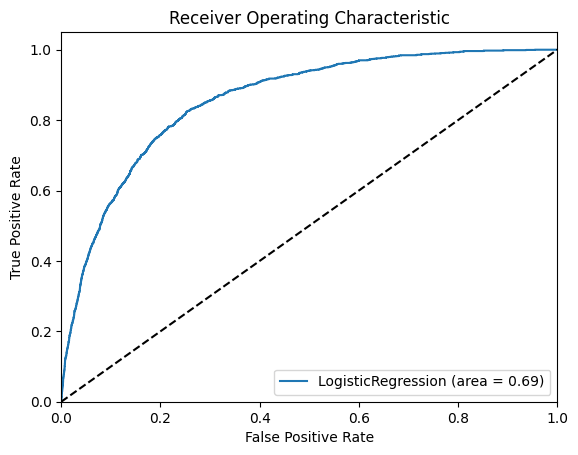

In [11]:
# Base Model - Logistic Regression
log_model = LogisticRegression(max_iter=1000)
evaluate_model(log_model, X_train_res, X_test, y_train_res, y_test)

Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94     11966
        True       0.58      0.49      0.53      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.72      0.74     13564
weighted avg       0.89      0.90      0.89     13564

Confusion Matrix:
[[11411   555]
 [  818   780]]
Accuracy Score: 0.8987761722205839
ROC AUC Score: 0.7208643618328693


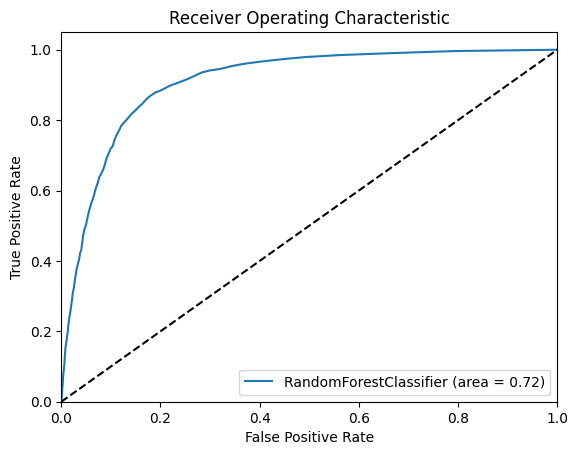

In [12]:
# Ensemble Model - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_res, X_test, y_train_res, y_test)

Model: XGBClassifier
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     11966
        True       0.55      0.54      0.55      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.74      0.74     13564
weighted avg       0.89      0.89      0.89     13564

Confusion Matrix:
[[11268   698]
 [  734   864]]
Accuracy Score: 0.894426422884105
ROC AUC Score: 0.7411719521539648


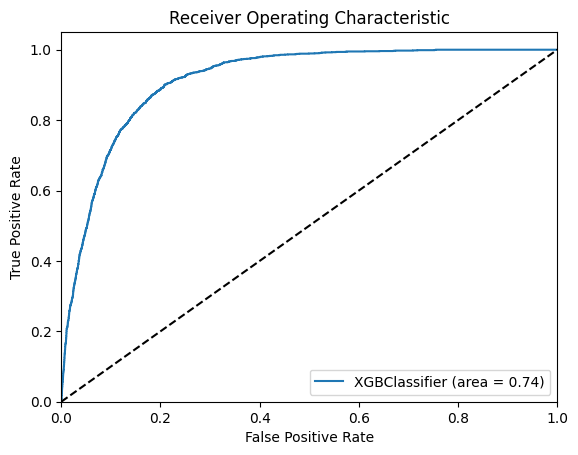

In [13]:
# Boosting Model - XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_model, X_train_res, X_test, y_train_res, y_test)

In [14]:
# Model Comparison Summary
print("Model Comparison:")
models = [log_model, rf_model, xgb_model]
for model in models:
    accuracy = accuracy_score(y_test, model.predict(X_test))
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))
    print(f"{model.__class__.__name__}: Accuracy = {accuracy}, ROC AUC = {roc_auc}")

Model Comparison:
LogisticRegression: Accuracy = 0.8806399292244176, ROC AUC = 0.8570500753386159
RandomForestClassifier: Accuracy = 0.8987761722205839, ROC AUC = 0.9090383485373765
XGBClassifier: Accuracy = 0.894426422884105, ROC AUC = 0.9141837417112356


FINAL RECOMMENDATION

Based on the need for interpretability and performance, Random Forest is the most suitable model for the bank's marketing campaign.

It offers a good balance between interpretability and performance, making it easier for business stakeholders to understand and trust the model's predictions.